In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import pandas as pd
import sqlalchemy

import sklearn.metrics as metrics
from tensorflow.python.data import Dataset

In [2]:
#getting movies dataset using Pandas from movie_metadata provided by Prof Zhang
movies_dataframe =  pd.read_csv("movie_metadata.csv", sep=",")

In [3]:
#getting actors dataset using Pandas from BuzzFeed
actors_dataframe = pd.read_csv("actor-metrics.csv", sep=",")

In [4]:
#getting biopics dataset using Pandas from 
biopics_dataframe = pd.read_csv("biopics.csv", sep=",", encoding='latin-1')

In [5]:
#renaming the lead actors column name for each table to have the same name 'lead_actors'
movies_dataframe = movies_dataframe.rename(columns={'actor_1_name': 'lead_actors'})
actors_dataframe = actors_dataframe.rename(columns={'actor': 'lead_actors'})
biopics_dataframe = biopics_dataframe.rename(columns={'lead_actor_actress': 'lead_actors'})

In [6]:
#Clean Up Part 1: Remove unnecessary columns
#I think we should first eliminate unnecessary columns and then merge, this way the table is easier to look at
#We should remove movies that are too old for us to look at!
movies_dataframe = movies_dataframe[['lead_actors', 'movie_title', 'title_year', 'gross', 'movie_facebook_likes', 'imdb_score']]
actors_dataframe = actors_dataframe[['lead_actors', 'gender', 'race_simple']]

In [7]:
#Clean Up Part 2: Merge
movies_dataframe_merged = movies_dataframe.merge(actors_dataframe,on='lead_actors').query('title_year>=2010.0')
# Something doesn't seem to work. On the right part of the big table there are weird things happening: 
# Another director than at the start, other films? Somehow we can not merge the tables this way I think? 
# Or is this part not about movies but just the actors? Then we really need to get rid of most columns!

In [8]:
movies_dataframe_merged

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,imdb_score,gender,race_simple
0,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,8.5,male,White
1,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,8.5,male,White
2,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,8.5,male,White
3,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,8.1,male,White
4,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,8.1,male,White
5,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,8.1,male,White
6,Tom Hardy,This Means War,2012.0,54758461.0,18000,6.3,male,White
7,Tom Hardy,This Means War,2012.0,54758461.0,18000,6.3,male,White
8,Tom Hardy,This Means War,2012.0,54758461.0,18000,6.3,male,White
12,Tom Hardy,Child 44,2015.0,1206135.0,18000,6.4,male,White


In [9]:
#Clean Up Part 3: Remove duplicates
#remove duplicates based on the movie – even though the actors are still duplicated but they worked on different projects with different gross
movies_dataframe_noDuplicates = movies_dataframe_merged.drop_duplicates(subset=['movie_title'], keep='first', inplace=False)
movies_dataframe_noDuplicates

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,imdb_score,gender,race_simple
0,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,8.5,male,White
3,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,8.1,male,White
6,Tom Hardy,This Means War,2012.0,54758461.0,18000,6.3,male,White
12,Tom Hardy,Child 44,2015.0,1206135.0,18000,6.4,male,White
15,Tom Hardy,Legend,2015.0,1865774.0,43000,7.0,male,White
18,Tom Hardy,Warrior,2011.0,13651662.0,77000,8.2,male,White
34,Peter Dinklage,Ice Age: Continental Drift,2012.0,161317423.0,14000,6.6,male,White
35,Peter Dinklage,Pixels,2015.0,78747585.0,39000,5.6,male,White
36,Peter Dinklage,The Angry Birds Movie,2016.0,107225164.0,14000,6.3,male,White
38,Peter Dinklage,The Boss,2016.0,63034755.0,0,5.3,male,White


In [10]:
#Clean Up Part 4: #check if we have movies that still have missing gross revenue in this data
movies_dataframe_noDuplicates[np.isnan(movies_dataframe_noDuplicates.gross)]

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,imdb_score,gender,race_simple
43,Peter Dinklage,Destiny,2014.0,NaN,1000,8.1,male,White
145,Jim Broadbent,Animals United,2010.0,NaN,885,4.9,male,White
295,Morgan Freeman,Ben-Hur,2016.0,NaN,0,6.1,male,POC
331,Meryl Streep,Florence Foster Jenkins,2016.0,NaN,0,7.1,female,White


In [11]:
#Clean Up Part 4: adding missing revenues to the data
#2 of these are video games – for now the revenue will be replaced with 0
missing_gross = {'Destiny': 0, 'Animals United': 0, 'Ben-Hur':26410477, 'Florence Foster Jenkins': 27383770}
for idx, row in movies_dataframe_noDuplicates[np.isnan(movies_dataframe_noDuplicates.gross)].iterrows():
    movies_dataframe_noDuplicates.at[idx, 'gross'] = missing_gross[row['movie_title'].strip()] 
    #https://stackoverflow.com/questions/10993612/python-removing-xa0-from-string

In [12]:
#Clean Up Part 4: check one more time if the NaN values are no longer in the data
movies_dataframe_noDuplicates[np.isnan(movies_dataframe_noDuplicates.gross)]

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,imdb_score,gender,race_simple


In [13]:
#getting movies dataset using Pandas from movie_metadata provided by Prof Zhang
movies_dataframe =  pd.read_csv("movie_metadata.csv", sep=",")
movies_dataframe

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [14]:
#getting actors dataset using Pandas from BuzzFeed
actors_dataframe = pd.read_csv("actor-metrics.csv", sep=",")

In [15]:
#getting biopics dataset using Pandas from 
biopics_dataframe = pd.read_csv("biopics.csv", sep=",", encoding='latin-1')

In [16]:
#renaming the lead actors column name for each table to have the same name 'lead_actors'
movies_dataframe = movies_dataframe.rename(columns={'actor_1_name': 'lead_actors'})
actors_dataframe = actors_dataframe.rename(columns={'actor': 'lead_actors'})
biopics_dataframe = biopics_dataframe.rename(columns={'lead_actor_actress': 'lead_actors'})

In [17]:
#Clean Up Part 1: Remove unnecessary columns
#I think we should first eliminate unnecessary columns and then merge, this way the table is easier to look at
movies_dataframe = movies_dataframe[['lead_actors','movie_title','gross','movie_facebook_likes']]
actors_dataframe = actors_dataframe[['lead_actors','gender', 'race','race_simple']]

In [18]:
#Clean Up Part 2: Merge
movies_dataframe_merged = movies_dataframe.merge(actors_dataframe,on='lead_actors')
# Something doesn't seem to work. On the right part of the big table there are weird things happening: 
# Another director than at the start, other films? Somehow we can not merge the tables this way I think? 
# Or is this part not about movies but just the actors? Then we really need to get rid of most columns!

In [19]:
#Clean Up Part 6: check and see movies with 0 Facebook likes
movies_dataframe_noDuplicates.query('movie_facebook_likes == 0')

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,imdb_score,gender,race_simple
38,Peter Dinklage,The Boss,2016.0,63034755.0,0,5.3,male,White
107,Tom Hanks,Larry Crowne,2011.0,35565975.0,0,6.1,male,White
140,Jim Broadbent,Arthur Christmas,2011.0,46440491.0,0,7.1,male,White
150,Jim Broadbent,Another Year,2010.0,3205244.0,0,7.3,male,White
209,Gary Oldman,Criminal,2016.0,14268533.0,0,6.3,male,White
229,Brad Pitt,By the Sea,2015.0,531009.0,0,5.3,male,White
234,Robin Williams,Happy Feet 2,2011.0,63992328.0,0,5.9,male,White
246,Robin Williams,The Big Wedding,2013.0,21784432.0,0,5.6,male,White
268,Matt Damon,Green Zone,2010.0,35024475.0,0,6.9,male,White
287,Matt Damon,Margaret,2011.0,46495.0,0,6.5,male,White


In [20]:
#Clean Up Part 6: adding missing Facebook likes to the data
missing_fb_likes = {'The Boss': 339554, 'Larry Crowne': 76200, 'Arthur Christmas': 621630, 'Another Year':3674,
                   'Criminal': 89404, 'By the Sea': 58198, 'Happy Feet 2': 9231151, 'The Big Wedding': 111836,
                   'Green Zone': 224559, 'Margaret': 109, 'Ben-Hur': 244880, 'Dolphin Tale': 470678,
                   'Dolphin Tale 2': 470678, 'The Smurfs 2': 13427249, 'Hope Springs': 194834, 'Florence Foster Jenkins': 43804,
                   'Young Adult': 64561, "Meek's Cutoff": 1272, 'Good Kill': 5903, 'Dinner for Schmucks': 15185,
                   'Freeheld': 52135, 'All Good Things': 45773, 'Rudderless': 28181, 'Cedar Rapids': 5485,
                   "Sarah's Key": 100, 'Mr. Turner': 7058, 'One Direction: This Is Us': 102132, 'That Awkward Moment': 1180067,
                   'The Last Exorcism': 1131959, 'The To Do List': 30926, 'Obvious Child': 51815}
for idx, row in movies_dataframe_noDuplicates.query('movie_facebook_likes == 0').iterrows():
    movies_dataframe_noDuplicates.at[idx, 'movie_facebook_likes'] = missing_fb_likes[row['movie_title'].strip()] 
    #https://stackoverflow.com/questions/10993612/python-removing-xa0-from-string

In [21]:
movies_dataframe_merged

,lead_actors,movie_title,gross,movie_facebook_likes,gender,race,race_simple
0,Tom Hardy,The Dark Knight Rises,448130642.0,164000,male,White/Caucasian,White
1,Tom Hardy,The Dark Knight Rises,448130642.0,164000,male,White/Caucasian,White
2,Tom Hardy,The Dark Knight Rises,448130642.0,164000,male,White/Caucasian,White
3,Tom Hardy,Mad Max: Fury Road,153629485.0,191000,male,White/Caucasian,White
4,Tom Hardy,Mad Max: Fury Road,153629485.0,191000,male,White/Caucasian,White
5,Tom Hardy,Mad Max: Fury Road,153629485.0,191000,male,White/Caucasian,White
6,Tom Hardy,This Means War,54758461.0,18000,male,White/Caucasian,White
7,Tom Hardy,This Means War,54758461.0,18000,male,White/Caucasian,White
8,Tom Hardy,This Means War,54758461.0,18000,male,White/Caucasian,White
9,Tom Hardy,Star Trek: Nemesis,43119879.0,0,male,White/Caucasian,White


In [22]:
#Adding some new data from 2017 and 2018 (some from 2016)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Gal Gadot' , 'movie_title' : 'Wonder Woman',
                                                                     'title_year': 2017 ,'gross': 412563408,
                                                                      'movie_facebook_likes': 2244745, 'imdb_score': 7.5,
                                                                      'gender': 'female', 'race_simple': 'White'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Gael Garcia Bernal' , 'movie_title' : 'Coco',
                                                                     'title_year': 2017 ,'gross': 209726015,
                                                                      'movie_facebook_likes': 744460, 'imdb_score': 8.4 ,
                                                                      'gender': 'male', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Daniel Kaluuya' , 'movie_title' : "Get Out",
                                                                     'title_year': 2017 ,'gross': 176040665,
                                                                      'movie_facebook_likes': 468828, 'imdb_score': 7.7,
                                                                      'gender': 'male', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Anna Kendrick' , 'movie_title' : "Pitch Perfect 3",
                                                                     'title_year': 2017 ,'gross': 104897530,
                                                                      'movie_facebook_likes': 5961116, 'imdb_score': 5.9,
                                                                      'gender': 'female', 'race_simple': 'White'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Samuel L. Jackson' , 'movie_title' : "The Hitman's Bodyguard",
                                                                     'title_year': 2017 ,'gross': 75468583,
                                                                      'movie_facebook_likes': 166718, 'imdb_score': 6.9,
                                                                      'gender': 'male', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Chadwick Boseman' , 'movie_title' : 'Black Panther',
                                                                     'title_year': 2018 ,'gross': 700059566,
                                                                      'movie_facebook_likes': 993239 , 'imdb_score': 7.4,
                                                                      'gender': 'male', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Sandra Bullock' , 'movie_title' : "Ocean's 8",
                                                                     'title_year': 2018 ,'gross': 139377762,
                                                                      'movie_facebook_likes': 1031, 'imdb_score': 6.2,
                                                                      'gender': 'female', 'race_simple': 'White'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Denzel Washington' , 'movie_title' : "The Equalizer 2",
                                                                     'title_year': 2018 ,'gross': 102084362,
                                                                      'movie_facebook_likes': 699100, 'imdb_score': 6.8,
                                                                      'gender': 'male', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Constance Wu' , 'movie_title' : "Crazy Rich Asians",
                                                                     'title_year': 2018 ,'gross': 173765895,
                                                                      'movie_facebook_likes': 92144, 'imdb_score': 7.2,
                                                                      'gender': 'female', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Margot Robbie' , 'movie_title' : "I, Tonya",
                                                                     'title_year': 2017 ,'gross': 30014539,
                                                                      'movie_facebook_likes': 47220, 'imdb_score': 7.5,
                                                                      'gender': 'female', 'race_simple': 'White'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Storm Reid' , 'movie_title' : "A Wrinkle in Time",
                                                                     'title_year': 2018 ,'gross': 100478608,
                                                                      'movie_facebook_likes': 132133, 'imdb_score': 4.2,
                                                                      'gender': 'female', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'John Boyega' , 'movie_title' : "Pacific Rim Uprising",
                                                                     'title_year': 2018 ,'gross': 59587110,
                                                                      'movie_facebook_likes': 2030862, 'imdb_score': 5.6,
                                                                      'gender': 'male', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Taraji P. Henson' , 'movie_title' : 'Hidden Figures',
                                                                     'title_year': 2016 ,'gross': 169607287,
                                                                      'movie_facebook_likes': 623303, 'imdb_score': 7.8,
                                                                      'gender': 'female', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Neel Sethi' , 'movie_title' : 'The Jungle Book',
                                                                     'title_year': 2016 ,'gross': 364001123,
                                                                      'movie_facebook_likes': 1235238, 'imdb_score': 7.4,
                                                                      'gender': 'male', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Alicia Vikander' , 'movie_title' : 'Tomb Raider',
                                                                     'title_year': 2018 ,'gross': 57421715,
                                                                      'movie_facebook_likes': 220540, 'imdb_score': 6.4,
                                                                      'gender': 'female', 'race_simple': 'White'}, ignore_index=True)
movies_dataframe_noDuplicates = movies_dataframe_noDuplicates.append({'lead_actors' : 'Michael B. Jordan' , 'movie_title' : 'Creed II',
                                                                     'title_year': 2018 ,'gross': 55806000,
                                                                      'movie_facebook_likes': 1063852, 'imdb_score': 8.0,
                                                                      'gender': 'male', 'race_simple': 'POC'}, ignore_index=True)
movies_dataframe_noDuplicates

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,imdb_score,gender,race_simple
0,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,8.5,male,White
1,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,8.1,male,White
2,Tom Hardy,This Means War,2012.0,54758461.0,18000,6.3,male,White
3,Tom Hardy,Child 44,2015.0,1206135.0,18000,6.4,male,White
4,Tom Hardy,Legend,2015.0,1865774.0,43000,7.0,male,White
5,Tom Hardy,Warrior,2011.0,13651662.0,77000,8.2,male,White
6,Peter Dinklage,Ice Age: Continental Drift,2012.0,161317423.0,14000,6.6,male,White
7,Peter Dinklage,Pixels,2015.0,78747585.0,39000,5.6,male,White
8,Peter Dinklage,The Angry Birds Movie,2016.0,107225164.0,14000,6.3,male,White
9,Peter Dinklage,The Boss,2016.0,63034755.0,339554,5.3,male,White


In [23]:
# VISUALIZATION
# Part 1: Categorization and data preparation

# First, get data for top categories: male (M) - female (F), white (W) - not white (N)
# TODO: Some data is missing! How do we fill it? Else it can ruin our statistics!
movies_f = movies_dataframe_noDuplicates.query('gender=="female"')
movies_m = movies_dataframe_noDuplicates.query('gender=="male"')
movies_w = movies_dataframe_noDuplicates.query('race_simple=="White"')
movies_n = movies_dataframe_noDuplicates.query('race_simple=="POC"')

# group and aggregate by title year
'''
QUESTION : Does it make sense to also summarize IMDB score ? 
or should we just calculate the average instead of the sum for grouping?

Solution --> Just take out IMDB from grouped data
'''
# https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func
movies_f_sum_by_year = movies_f.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_m_sum_by_year = movies_m.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_w_sum_by_year = movies_w.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_n_sum_by_year = movies_n.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()

In [24]:
#Adding to the db if no values for a year are available
print('Movies with non white lead actors, unedited table \n', movies_n_sum_by_year)

#Since there is no data for movies_n_sum_by_year for years 2012 and 2015, we add 0s there.
movies_n_sum_by_year = movies_n_sum_by_year.append(pd.DataFrame([[2012.0,0,0],[2015.0,0,0]], columns=['title_year', 'gross', 'movie_facebook_likes'])).sort_values(by='title_year')
print('Movies with non white lead actors*, 0-values added for completeness \n', movies_n_sum_by_year)

Movies with non white lead actors, unedited table 
    title_year         gross  movie_facebook_likes
0      2011.0  8.040914e+07                487678
1      2013.0  2.101680e+08                206926
2      2014.0  2.997757e+08                534678
3      2016.0  5.600189e+08               2103421
4      2017.0  4.612353e+08               1380006
5      2018.0  1.191782e+09               5011330
Movies with non white lead actors*, 0-values added for completeness 
    title_year         gross  movie_facebook_likes
0      2011.0  8.040914e+07                487678
0      2012.0  0.000000e+00                     0
1      2013.0  2.101680e+08                206926
2      2014.0  2.997757e+08                534678
1      2015.0  0.000000e+00                     0
3      2016.0  5.600189e+08               2103421
4      2017.0  4.612353e+08               1380006
5      2018.0  1.191782e+09               5011330


In [25]:
#Next, get data for sub categories: male & white, male & not white, female & white, female & not white
movies_mw = movies_m.query('race_simple=="White"')
movies_mn = movies_m.query('race_simple=="POC"')
movies_fw = movies_f.query('race_simple=="White"')
movies_fn = movies_f.query('race_simple=="POC"')

# group and aggregate by title year
# https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func
movies_fw_sum_by_year = movies_fw.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_mw_sum_by_year = movies_mw.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_fn_sum_by_year = movies_fn.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_mn_sum_by_year = movies_mn.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()

In [26]:
#Adding to database if no data for a year is available
print('Movies with non white lead actresses, unedited table \n', movies_fn_sum_by_year)

#Since there is no data for movies_n_sum_by_year for years 2012 and 2015, we add 0s there.
movies_fn_sum_by_year = movies_fn_sum_by_year.append(pd.DataFrame([[2010.0,0,0],[2011.0,0,0],[2012.0,0,0],[2013.0,0,0],[2014.0,0,0],[2015.0,0,0],[2017.0,0,0]], columns=['title_year', 'gross', 'movie_facebook_likes'])).sort_values(by='title_year')
print('Movies with non white lead actresses, 0-values added for completeness \n', movies_fn_sum_by_year)

print('Movies with non white lead actors, unedited table \n', movies_mn_sum_by_year)

#Since there is no data for movies_n_sum_by_year for years 2012 and 2015, we add 0s there.
movies_mn_sum_by_year = movies_mn_sum_by_year.append(pd.DataFrame([[2012.0,0,0],[2015.0,0,0]], columns=['title_year', 'gross', 'movie_facebook_likes'])).sort_values(by='title_year')
print('Movies with non white lead actors, 0-values added for completeness \n', movies_mn_sum_by_year)

#add subcategory to the datasets
pd.options.mode.chained_assignment = None #disable default warning that is a false positive here https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
movies_fw['subcat'] = 'female, white'
movies_fn['subcat'] = 'female, POC'
movies_mw['subcat'] = 'male, white'
movies_mn['subcat'] = 'male, POC'

frames = [movies_fw, movies_mw, movies_fn, movies_mn] 

#merge all datasets together for later use
movies_with_subcat = pd.concat(frames) #http://pandas.pydata.org/pandas-docs/stable/merging.html
movies_with_subcat

Movies with non white lead actresses, unedited table 
    title_year        gross  movie_facebook_likes
0      2016.0  169607287.0                623303
1      2018.0  274244503.0                224277
Movies with non white lead actresses, 0-values added for completeness 
    title_year        gross  movie_facebook_likes
0      2010.0          0.0                     0
1      2011.0          0.0                     0
2      2012.0          0.0                     0
3      2013.0          0.0                     0
4      2014.0          0.0                     0
5      2015.0          0.0                     0
0      2016.0  169607287.0                623303
6      2017.0          0.0                     0
1      2018.0  274244503.0                224277
Movies with non white lead actors, unedited table 
    title_year        gross  movie_facebook_likes
0      2011.0   80409145.0                487678
1      2013.0  210167968.0                206926
2      2014.0  299775680.0           

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,imdb_score,gender,race_simple,subcat
37,Scarlett Johansson,The Jungle Book,2016.0,362645141.0,65000,7.8,female,White,"female, white"
38,Scarlett Johansson,Captain America: The Winter Soldier,2014.0,259746958.0,55000,7.8,female,White,"female, white"
39,Scarlett Johansson,We Bought a Zoo,2011.0,75621915.0,22000,7.1,female,White,"female, white"
40,Scarlett Johansson,Lucy,2014.0,126546825.0,83000,6.4,female,White,"female, white"
41,Scarlett Johansson,Her,2013.0,25556065.0,148000,8.0,female,White,"female, white"
42,Scarlett Johansson,"Hail, Caesar!",2016.0,29997095.0,23000,6.4,female,White,"female, white"
43,Scarlett Johansson,Under the Skin,2013.0,2605039.0,29000,6.3,female,White,"female, white"
74,Abbie Cornish,Legend of the Guardians: The Owls of Ga'Hoole,2010.0,55673333.0,16000,7.0,female,White,"female, white"
75,Abbie Cornish,Seven Psychopaths,2012.0,14989761.0,52000,7.2,female,White,"female, white"
76,Meryl Streep,Hope Springs,2012.0,63536011.0,194834,6.3,female,White,"female, white"


In [27]:
# Part 2: Bar diagrams for overall development

# The following function creates a bar chart with two y-Axis and one x-Axis.
def vis_bar(title, x_axis, y_axis1, y_label1, y_axis2, y_label2, **keyword_parameters):
    ind = np.arange(len(x_axis))
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax2 = ax.twinx() #https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib#14762601

    #https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    rects1 = ax.bar(ind - width/2, y_axis1, width, yerr=0, xerr=0,
                color='SkyBlue', label=y_label1)
    rects2 = ax2.bar(ind + width/2, y_axis2, width, yerr=0, xerr=0,
                color='IndianRed', label=y_label2)
    
    ax.set_ylabel(y_label1)
    ax2.set_ylabel(y_label2)
    
    ax.legend(bbox_to_anchor=(1.3, 1), loc=2, borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(1.3, 0.9), loc=2, borderaxespad=0.)
    
    ax.set_xticks(ind)
    ax.set_xticklabels(x_axis)
    
    plt.title(label=title, pad=20.0, loc='left')
    
    #https://stackoverflow.com/questions/14017996/is-there-a-way-to-pass-optional-parameters-to-a-function
    if('horizontal_xlabels' not in keyword_parameters):
        #https://stackoverflow.com/questions/12273712/matplotlib-xticks-labels-overlap
        plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
    
    path='graphs/' + title.replace(" ", "").replace("*", "").replace(":", "") + '.png'
    fig.savefig(path, transparent=True, bbox_inches='tight') #save the graph
    print('saved to ', path)
    
    plt.show()

saved to  graphs/NNotwhiteleadactorsDevelopment.png


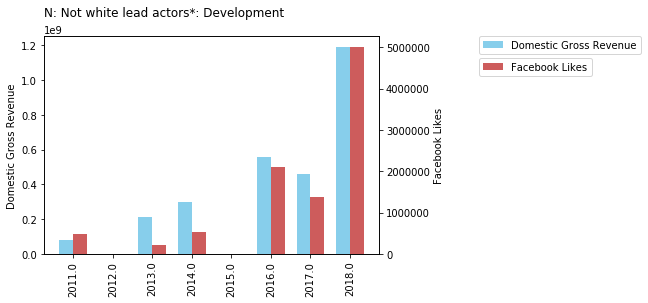

saved to  graphs/WWhiteleadactorsDevelopment.png


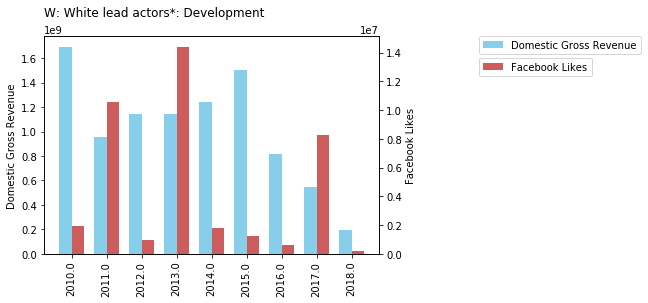

saved to  graphs/FFemaleleadactressesDevelopment.png


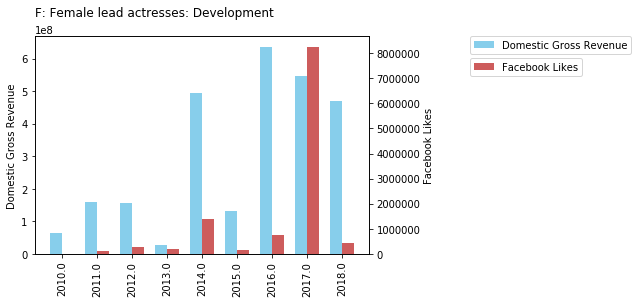

saved to  graphs/MMaleleadactorsDevelopment.png


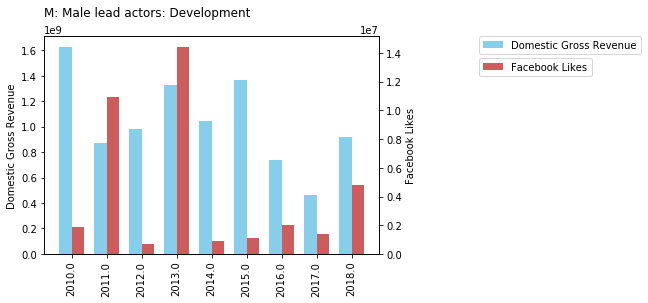

In [28]:
# Creating bar charts for all top categories
# Commented out because this doesn't have to run each time.
vis_bar(title='N: Not white lead actors*: Development', x_axis=movies_n_sum_by_year['title_year'], y_axis1=movies_n_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_n_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
vis_bar(title='W: White lead actors*: Development', x_axis=movies_w_sum_by_year['title_year'], y_axis1=movies_w_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_w_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
vis_bar(title='F: Female lead actresses: Development', x_axis=movies_f_sum_by_year['title_year'], y_axis1=movies_f_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_f_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
vis_bar(title='M: Male lead actors: Development', x_axis=movies_m_sum_by_year['title_year'], y_axis1=movies_m_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_m_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
#vis_bar(title='N: Not white lead actors: Total Revenue & IMDB Score', x_axis=movies_n_sum_by_year['title_year'], y_axis1=movies_n_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_n_sum_by_year['imdb_score'], y_label2='Total IMDB Score')
#vis_bar(title='W: White lead actors: Total Revenue & IMDB Score', x_axis=movies_w_sum_by_year['title_year'], y_axis1=movies_w_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_w_sum_by_year['imdb_score'], y_label2='Total IMDB Score')
#vis_bar(title='F: Female lead actresses: Total Revenue & IMDB Score', x_axis=movies_f_sum_by_year['title_year'], y_axis1=movies_f_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_f_sum_by_year['imdb_score'], y_label2='Total IMDB Score')
#vis_bar(title='M: Male lead actors: Total Revenue & IMDB Score', x_axis=movies_m_sum_by_year['title_year'], y_axis1=movies_m_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_m_sum_by_year['imdb_score'], y_label2='Total IMDB Score')

saved to  graphs/FNNotwhiteleadactressesDevelopment.png


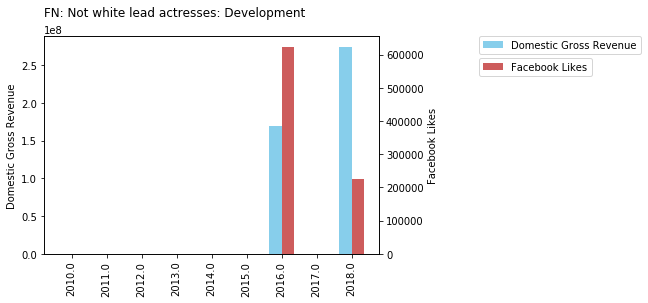

saved to  graphs/FWWhiteleadactressesDevelopment.png


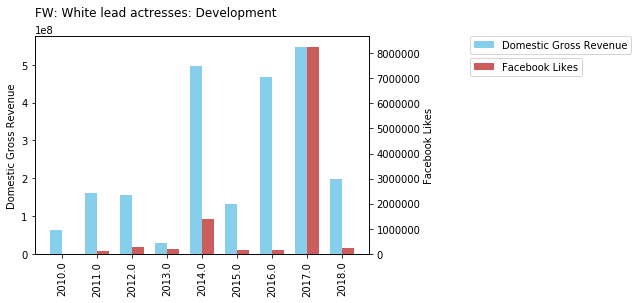

saved to  graphs/MNNotwhiteleadactorsDevelopment.png


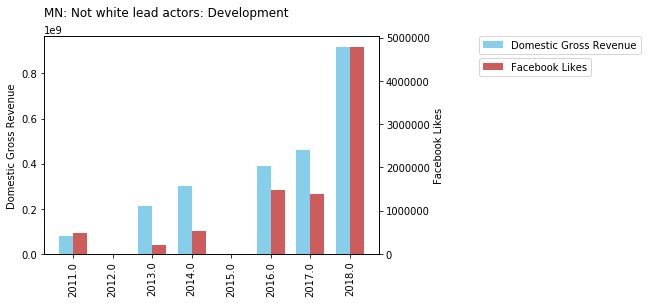

saved to  graphs/MWWhiteleadactorsDevelopment.png


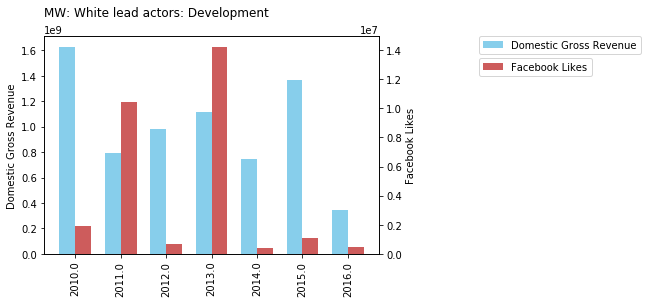

In [29]:
# Creating bar charts for all sub categories
# Commented out because this doesn't have to run each time.
vis_bar(title='FN: Not white lead actresses: Development', x_axis=movies_fn_sum_by_year['title_year'], y_axis1=movies_fn_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_fn_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
vis_bar(title='FW: White lead actresses: Development', x_axis=movies_fw_sum_by_year['title_year'], y_axis1=movies_fw_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_fw_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
vis_bar(title='MN: Not white lead actors: Development', x_axis=movies_mn_sum_by_year['title_year'], y_axis1=movies_mn_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_mn_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
vis_bar(title='MW: White lead actors: Development', x_axis=movies_mw_sum_by_year['title_year'], y_axis1=movies_mw_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_mw_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
#vis_bar(title='FN: Not white lead actresses: Total Revenue & IMDB Score', x_axis=movies_fn_sum_by_year['title_year'], y_axis1=movies_fn_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_fn_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
#vis_bar(title='FW: White lead actresses: Total Revenue & IMDB Score', x_axis=movies_fw_sum_by_year['title_year'], y_axis1=movies_fw_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_fw_sum_by_year['imdb_score'], y_label2='Total IMDB Score')
#vis_bar(title='MN: Not white lead actors: Total Revenue & IMDB Score', x_axis=movies_mn_sum_by_year['title_year'], y_axis1=movies_mn_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_mn_sum_by_year['imdb_score'], y_label2='Total IMDB Score')
#vis_bar(title='MW: White lead actors: Total Revenue & IMDB Score', x_axis=movies_mw_sum_by_year['title_year'], y_axis1=movies_mw_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_mw_sum_by_year['imdb_score'], y_label2='Total IMDB Score')

In [30]:
#Part 3: calculate total and average domestic gross revenue and fb likes for each top category and sub category 
#and make a dataframe from it
#columns: CATEGORY | total fb likes | average fb likes | total domestic gross revenue | average domestic gross revenue 
#categories: 
# df 1 g: M, F, 
# df 2 r: W, N; 
# df 3 gr: MW, MN, FW, FN
def sumAndAvg(col1, col2, col3):
    row = [0,0,0,0,0,0]
    i = 0
    for col in [col1, col2, col3]:
        row[i] = col.sum()
        i+=1
        row[i] = col.mean()
        i+=1
    return row

dfs = [movies_m, movies_f, movies_w, movies_n, movies_mw, movies_mn, movies_fw, movies_fn]

columns=['total_gross', 'average_gross', 'total_movie_facebook_likes', 'average_movie_facebook_likes', 'total_imdb_score','average_of_imdb_score']
categories = ['m', 'f', 'w', 'n', 'mw', 'mn', 'fw', 'fn']
rows = [sumAndAvg(df['gross'], df['movie_facebook_likes'], df['imdb_score']) for df in dfs]

statisticalResults = pd.DataFrame(rows, columns=columns).assign(category=categories)
print(statisticalResults)

    total_gross  average_gross  total_movie_facebook_likes  \
0  9.343499e+09   9.160293e+07                    38072933   
1  2.691422e+09   8.155824e+07                    11617471   
2  9.231532e+09   7.958218e+07                    39966365   
3  2.803388e+09   1.475468e+08                     9724039   
4  6.983962e+09   8.120886e+07                    29196474   
5  2.359537e+09   1.474710e+08                     8876459   
6  2.247570e+09   7.491901e+07                    10769891   
7  4.438518e+08   1.479506e+08                      847580   

   average_movie_facebook_likes  total_imdb_score  average_of_imdb_score  \
0                 373264.049020             709.4               6.954902   
1                 352044.575758             223.8               6.781818   
2                 344537.629310             802.2               6.915517   
3                 511791.526316             131.0               6.894737   
4                 339493.883721             597.6            

In [31]:
#Part 4: Get own dataframes for each category: gender, race, race and gender
g = statisticalResults[(statisticalResults.category == 'm') | (statisticalResults.category == 'f')]
r = statisticalResults[(statisticalResults.category == 'w') | (statisticalResults.category == 'n')]
gr = statisticalResults[(statisticalResults.category == 'mw') | (statisticalResults.category == 'fw') | (statisticalResults.category == 'mn') | (statisticalResults.category == 'fn')]

saved to  graphs/GenderTotal.png


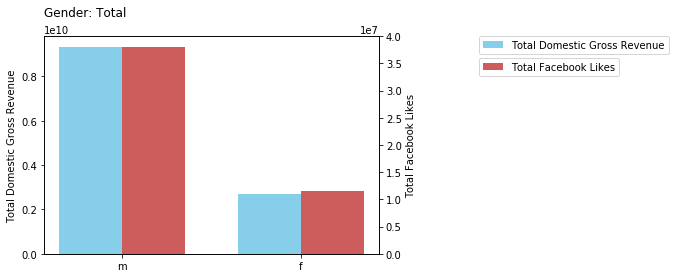

saved to  graphs/RaceTotal.png


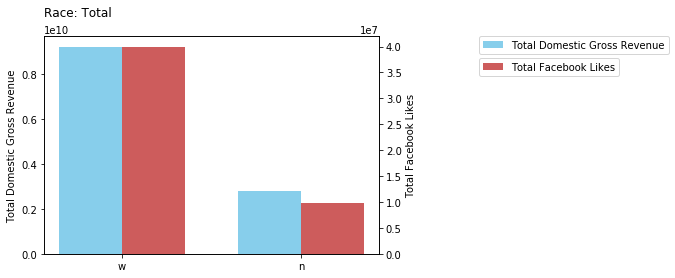

saved to  graphs/RaceandGenderTotal.png


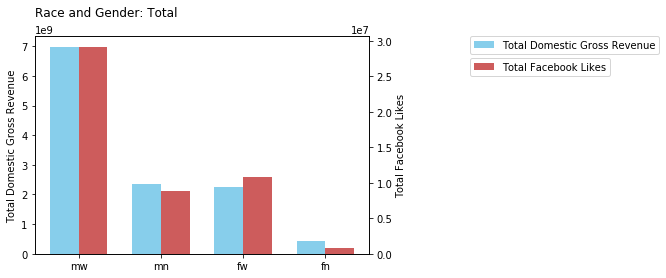

In [32]:
#Part 5a: Compare total dgr & fb likes per categories with bar diagrams
#Commented out because not needed to run every time
vis_bar(title='Gender: Total', x_axis=g['category'], y_axis1=g['total_gross'], y_label1='Total Domestic Gross Revenue', y_axis2=g['total_movie_facebook_likes'], y_label2='Total Facebook Likes', horizontal_xlabels=True)
vis_bar(title='Race: Total', x_axis=r['category'], y_axis1=r['total_gross'], y_label1='Total Domestic Gross Revenue', y_axis2=r['total_movie_facebook_likes'], y_label2='Total Facebook Likes', horizontal_xlabels=True)

vis_bar(title='Race and Gender: Total', x_axis=gr['category'], y_axis1=gr['total_gross'], y_label1='Total Domestic Gross Revenue', y_axis2=gr['total_movie_facebook_likes'], y_label2='Total Facebook Likes', horizontal_xlabels=True)

saved to  graphs/GenderAverage.png


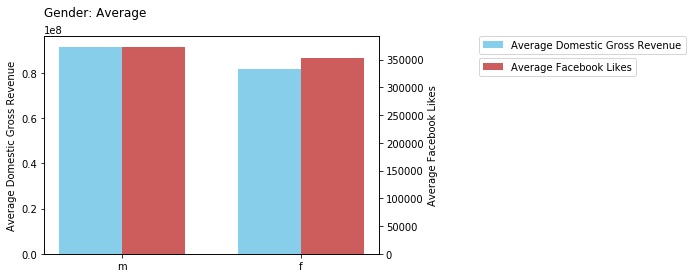

saved to  graphs/RaceAverage.png


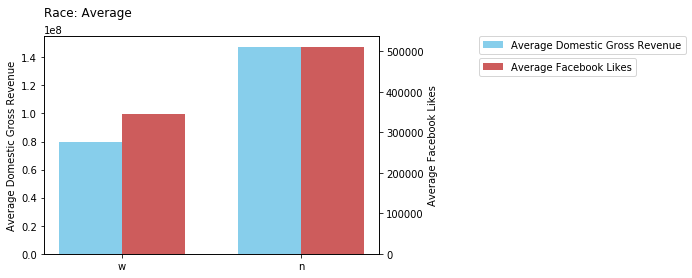

saved to  graphs/RaceandGenderAverage.png


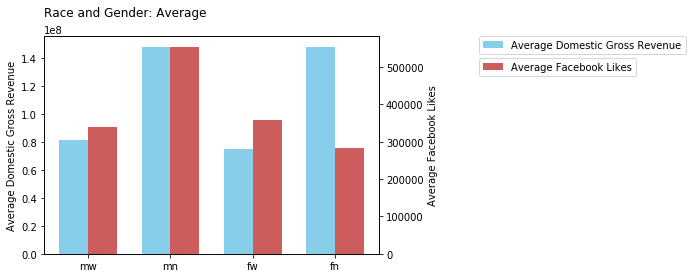

In [33]:
#Part 6a: Compare average dgr & fb likes per categories
#Commented out because not needed to run every time
vis_bar(title='Gender: Average', x_axis=g['category'], y_axis1=g['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=g['average_movie_facebook_likes'], y_label2='Average Facebook Likes', horizontal_xlabels=True)
vis_bar(title='Race: Average', x_axis=r['category'], y_axis1=r['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=r['average_movie_facebook_likes'], y_label2='Average Facebook Likes', horizontal_xlabels=True)

vis_bar(title='Race and Gender: Average', x_axis=gr['category'], y_axis1=gr['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=gr['average_movie_facebook_likes'], y_label2='Average Facebook Likes', horizontal_xlabels=True)

saved to  graphs/GenderAverageGrossRevenue&IMDBScore.png


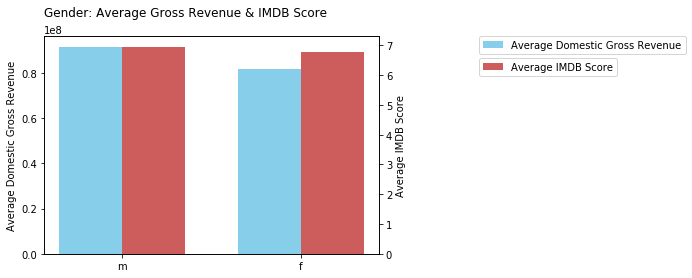

saved to  graphs/RaceAverageGrossRevenue&IMDBScore.png


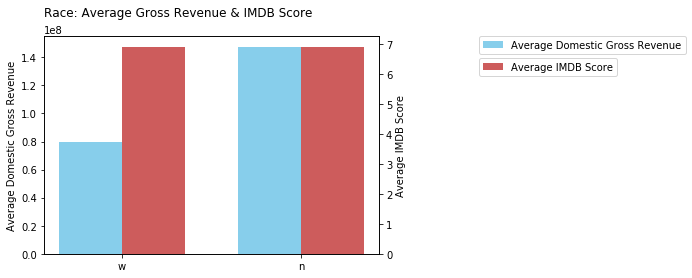

saved to  graphs/RaceandGenderAverageGrossRevenue&IMDBScore.png


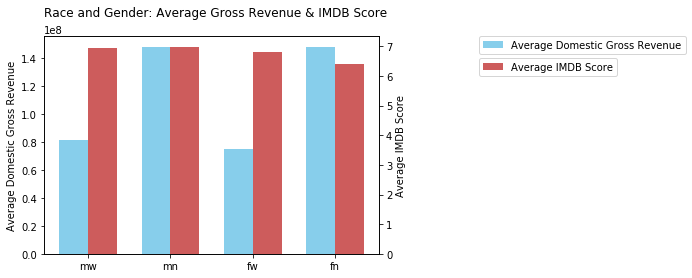

In [34]:
#Part 6b: Compare average dgr & IMDB per categories
#Commented out because not needed to run every time
vis_bar(title='Gender: Average Gross Revenue & IMDB Score', x_axis=g['category'], y_axis1=g['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=g['average_of_imdb_score'], y_label2='Average IMDB Score', horizontal_xlabels=True)
vis_bar(title='Race: Average Gross Revenue & IMDB Score', x_axis=r['category'], y_axis1=r['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=r['average_of_imdb_score'], y_label2='Average IMDB Score', horizontal_xlabels=True)

vis_bar(title='Race and Gender: Average Gross Revenue & IMDB Score', x_axis=gr['category'], y_axis1=gr['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=gr['average_of_imdb_score'], y_label2='Average IMDB Score', horizontal_xlabels=True)


In [35]:
#Part 7a: Function for making a pie chart
#https://pythonspot.com/matplotlib-pie-chart/
#https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def vis_pie(title, legend, value, label):
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(value, autopct='%1.1f%%',
                                      textprops=dict(color="w"))

    ax.legend(wedges, legend,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title(label)

    path='graphs/' + title.replace(" ", "").replace("*", "").replace(":", "") + '.png'
    fig.savefig(path, transparent=True, bbox_inches='tight') #save the graph
    print('saved to ', path)
    
    plt.show()

saved to  graphs/GenderGrossTotal.png


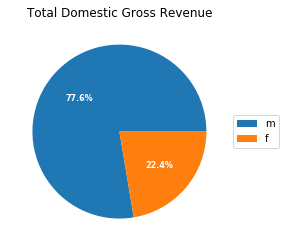

saved to  graphs/GenderFacebookLikesTotal.png


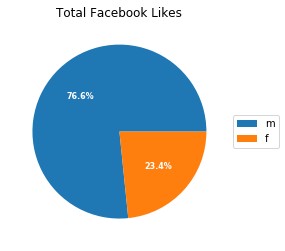

saved to  graphs/RaceGrossTotal.png


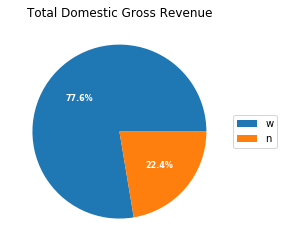

saved to  graphs/RaceFacebookLikesTotal.png


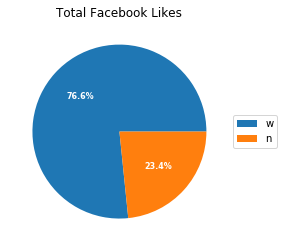

saved to  graphs/RaceandGenderGrossTotal.png


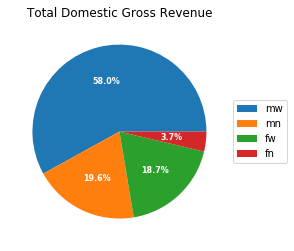

saved to  graphs/RaceandGenderFacebookLikesTotal.png


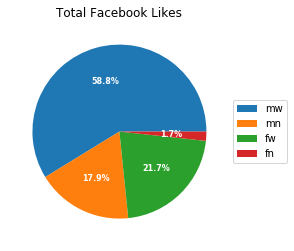

In [36]:
#Part 7: Compare total dgr, fb likes, and IMDB Score per categories with pie diagrams
vis_pie(title='Gender: Gross: Total', legend=g['category'], value=g['total_gross'], label='Total Domestic Gross Revenue')
vis_pie(title='Gender: Facebook Likes: Total', legend=g['category'], value=g['total_movie_facebook_likes'], label='Total Facebook Likes')
#vis_pie(title='Gender: IMDB Score: Total ', legend=g['category'], value=g['total_imdb_score'], label='Total IMDB Score based on gender')

vis_pie(title='Race: Gross: Total', legend=r['category'], value=g['total_gross'], label='Total Domestic Gross Revenue')
vis_pie(title='Race: Facebook Likes: Total', legend=r['category'], value=g['total_movie_facebook_likes'], label='Total Facebook Likes')
#vis_pie(title='Race: IMDB Score: Total ', legend=r['category'], value=r['total_imdb_score'], label='Total IMDB Score based on race')

vis_pie(title='Race and Gender: Gross: Total', legend=gr['category'], value=gr['total_gross'], label='Total Domestic Gross Revenue')
vis_pie(title='Race and Gender: Facebook Likes: Total', legend=gr['category'], value=gr['total_movie_facebook_likes'], label='Total Facebook Likes')
#vis_pie(title='Race and Gender: IMDB Score: Total ', legend=gr['category'], value=gr['total_imdb_score'], label='Total IMDB Score based on gender and race')

In [37]:
#Part 8 (new!): Create splatter diagrams of 
def vis_splat(x_axis, y_axis, ylabel, title, filename):
    fig, ax = plt.subplots()
    plt.plot(x_axis, y_axis, 'o', alpha=.5, label=ylabel)
    #https://matplotlib.org/users/legend_guide.html
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(label=title, pad=20.0, loc='left')
    
    path='graphs/' + filename.replace(" ", "").replace("*", "").replace(":", "") + '.png'
    fig.savefig(path, transparent=True, bbox_inches='tight') #save the graph
    print('saved to ', path)
    
    plt.show()

saved to  graphs/scatter_year_gross_f.png


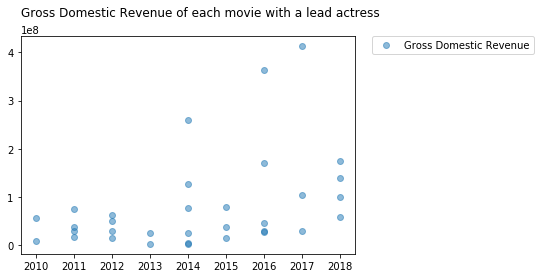

saved to  graphs/scatter_year_gross_m.png


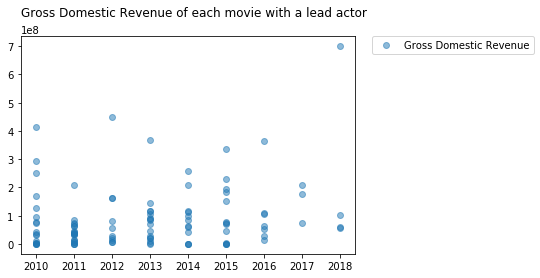

saved to  graphs/scatter_year_gross_w.png


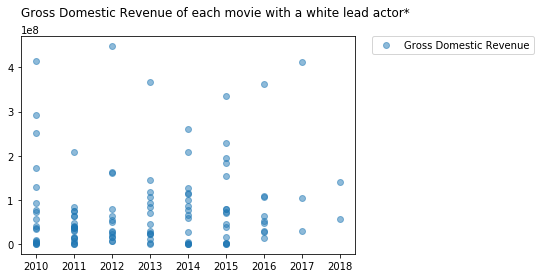

saved to  graphs/scatter_year_gross_n.png


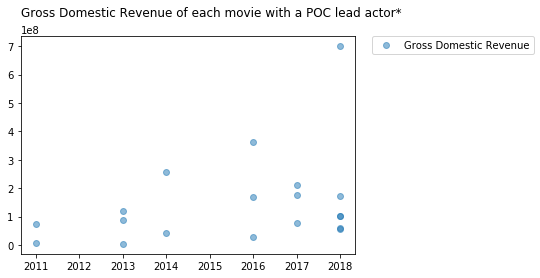

saved to  graphs/scatter_year_gross_mw.png


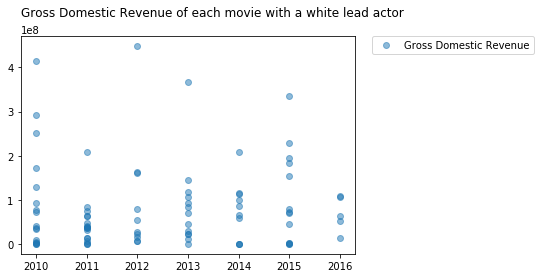

saved to  graphs/scatter_year_gross_mn.png


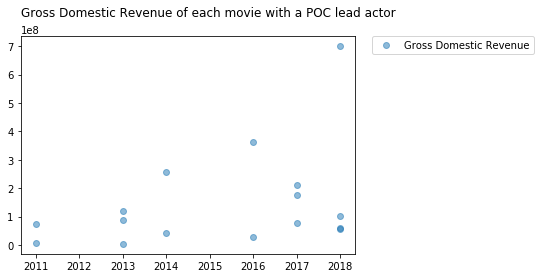

saved to  graphs/scatter_year_gross_fw.png


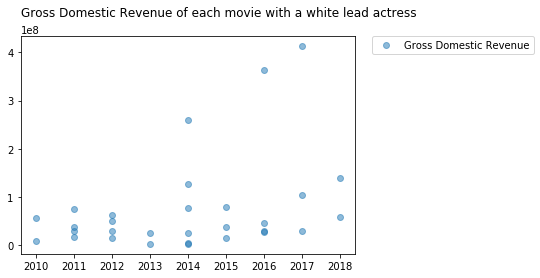

saved to  graphs/scatter_year_gross_fn.png


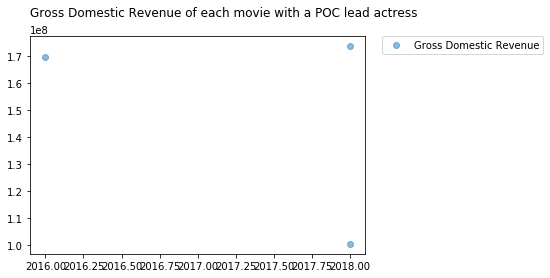

In [38]:
# a) x = year of movie, y = gross (each movie) (for female)
# x = year of movie, y = gross (each movie) (for male)
# x = year of movie, y = gross (each movie) (for white)
# x = year of movie, y = gross (each movie) (for POC)
# x = year of movie, y = gross (each movie) (for mw, mn, fw, fn)
# commented out for now, since this doesn't have to run each time
vis_splat(movies_f["title_year"], movies_f["gross"], "Gross Domestic Revenue", "Gross Domestic Revenue of each movie with a lead actress", "scatter_year_gross_f")
vis_splat(movies_m["title_year"], movies_m["gross"], "Gross Domestic Revenue", "Gross Domestic Revenue of each movie with a lead actor", "scatter_year_gross_m")
vis_splat(movies_w["title_year"], movies_w["gross"], "Gross Domestic Revenue", "Gross Domestic Revenue of each movie with a white lead actor*", "scatter_year_gross_w")
vis_splat(movies_n["title_year"], movies_n["gross"], "Gross Domestic Revenue", "Gross Domestic Revenue of each movie with a POC lead actor*", "scatter_year_gross_n")

vis_splat(movies_mw["title_year"], movies_mw["gross"], "Gross Domestic Revenue", "Gross Domestic Revenue of each movie with a white lead actor", "scatter_year_gross_mw")
vis_splat(movies_mn["title_year"], movies_mn["gross"], "Gross Domestic Revenue", "Gross Domestic Revenue of each movie with a POC lead actor", "scatter_year_gross_mn")
vis_splat(movies_fw["title_year"], movies_fw["gross"], "Gross Domestic Revenue", "Gross Domestic Revenue of each movie with a white lead actress", "scatter_year_gross_fw")
vis_splat(movies_fn["title_year"], movies_fn["gross"], "Gross Domestic Revenue", "Gross Domestic Revenue of each movie with a POC lead actress", "scatter_year_gross_fn")

saved to  graphs/scatter_year_likes_f.png


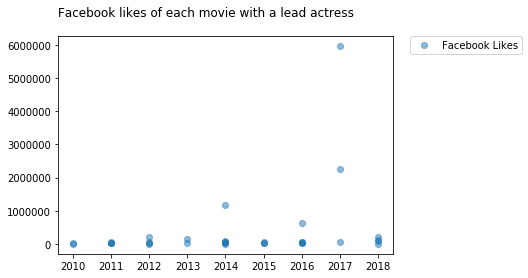

saved to  graphs/scatter_year_likes_m.png


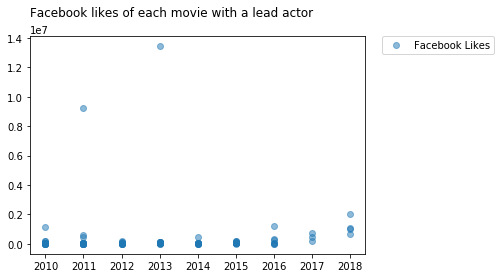

saved to  graphs/scatter_year_likes_w.png


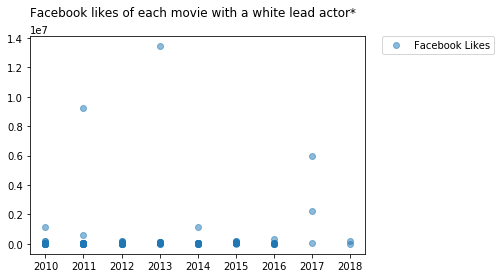

saved to  graphs/scatter_year_likes_n.png


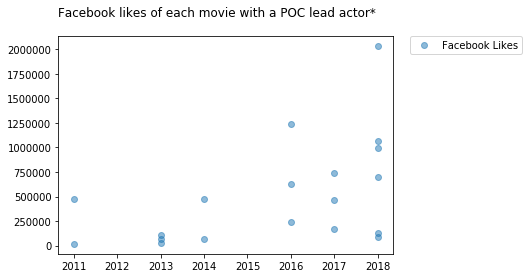

saved to  graphs/scatter_year_likes_mw.png


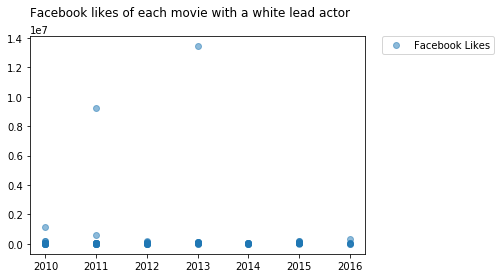

saved to  graphs/scatter_year_likes_mn.png


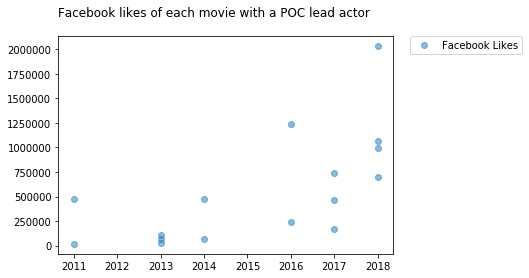

saved to  graphs/scatter_year_likes_fw.png


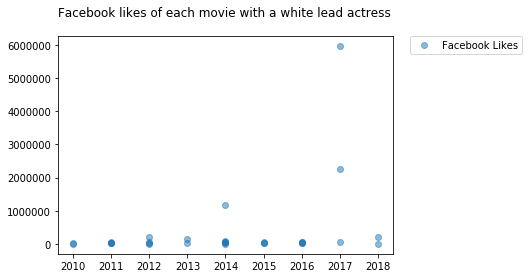

saved to  graphs/scatter_year_likes_fn.png


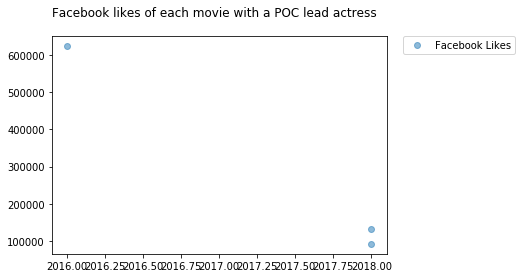

In [39]:
# b) x = year of movie, y = FB likes
# commented out for now, since this doesn't have to run each time
vis_splat(movies_f["title_year"], movies_f["movie_facebook_likes"], "Facebook Likes", "Facebook likes of each movie with a lead actress", "scatter_year_likes_f")
vis_splat(movies_m["title_year"], movies_m["movie_facebook_likes"], "Facebook Likes", "Facebook likes of each movie with a lead actor", "scatter_year_likes_m")
vis_splat(movies_w["title_year"], movies_w["movie_facebook_likes"], "Facebook Likes", "Facebook likes of each movie with a white lead actor*", "scatter_year_likes_w")
vis_splat(movies_n["title_year"], movies_n["movie_facebook_likes"], "Facebook Likes", "Facebook likes of each movie with a POC lead actor*", "scatter_year_likes_n")

vis_splat(movies_mw["title_year"], movies_mw["movie_facebook_likes"], "Facebook Likes", "Facebook likes of each movie with a white lead actor", "scatter_year_likes_mw")
vis_splat(movies_mn["title_year"], movies_mn["movie_facebook_likes"], "Facebook Likes", "Facebook likes of each movie with a POC lead actor", "scatter_year_likes_mn")
vis_splat(movies_fw["title_year"], movies_fw["movie_facebook_likes"], "Facebook Likes", "Facebook likes of each movie with a white lead actress", "scatter_year_likes_fw")
vis_splat(movies_fn["title_year"], movies_fn["movie_facebook_likes"], "Facebook Likes", "Facebook likes of each movie with a POC lead actress", "scatter_year_likes_fn")

saved to  graphs/scatter_gender_gross.png


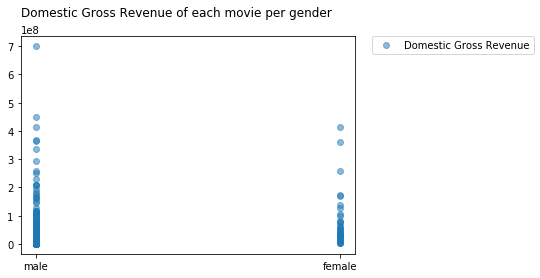

saved to  graphs/scatter_gender_likes.png


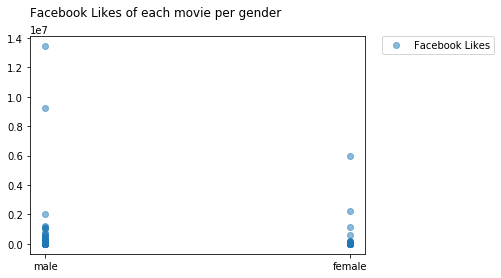

saved to  graphs/scatter_race_gross.png


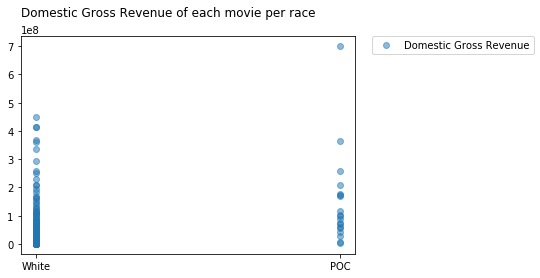

saved to  graphs/scatter_race_likes.png


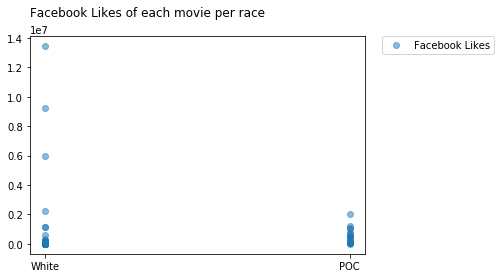

In [40]:
# c) x = gender of lead actor, y = gross (each movie)
# d) x = gender, y = FB likes
# commented out
vis_splat(movies_dataframe_noDuplicates["gender"], movies_dataframe_noDuplicates["gross"], "Domestic Gross Revenue", "Domestic Gross Revenue of each movie per gender", "scatter_gender_gross")
vis_splat(movies_dataframe_noDuplicates["gender"], movies_dataframe_noDuplicates["movie_facebook_likes"], "Facebook Likes", "Facebook Likes of each movie per gender", "scatter_gender_likes")

# e) x = race, y = gross
# e) x = race, y = fb likes
# commented out
vis_splat(movies_dataframe_noDuplicates["race_simple"], movies_dataframe_noDuplicates["gross"], "Domestic Gross Revenue", "Domestic Gross Revenue of each movie per race", "scatter_race_gross")
vis_splat(movies_dataframe_noDuplicates["race_simple"], movies_dataframe_noDuplicates["movie_facebook_likes"], "Facebook Likes", "Facebook Likes of each movie per race", "scatter_race_likes")

saved to  graphs/scatter_gr_gross.png


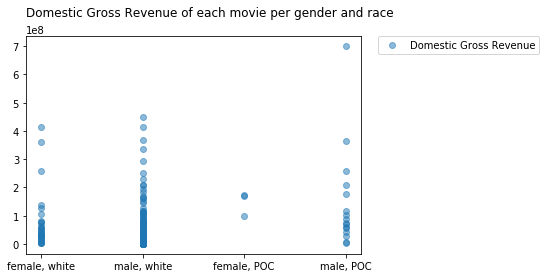

saved to  graphs/scatter_gr_likes.png


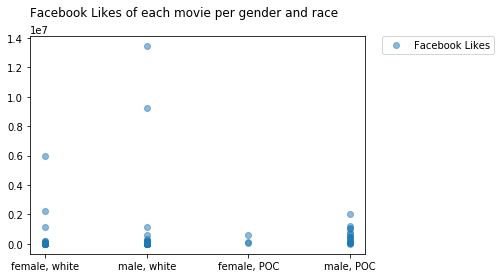

In [41]:
# f) x = gender and race, y = gross
# g) x = gender and race, y = FB likes  
# commented out because this doesn't have to run each time
vis_splat(movies_with_subcat["subcat"], movies_with_subcat["gross"], "Domestic Gross Revenue", "Domestic Gross Revenue of each movie per gender and race", "scatter_gr_gross")
vis_splat(movies_with_subcat["subcat"], movies_with_subcat["movie_facebook_likes"], "Facebook Likes", "Facebook Likes of each movie per gender and race", "scatter_gr_likes")

In [42]:
#IMDB score of each film based on gender and race
#commented because this was just a test
#vis_splat(movies_with_subcat["subcat"], movies_with_subcat["imdb_score"], "IMfDB Score", "IMDB Score of each movie per gender and race", "scatter_gr_imdb")